#Zagadnienie transportowe

##Algorytm transportowy
Metody:


*   Kąta północno-zachodniego
*   Najmniejszego elementu macierzy
*   Aproksymacji Vogel'a



In [2]:
import numpy as np
import copy
import random
import time

INF=100**4

#pomocnicze funkcje

def generuj_liste(oczekiwana_suma,dlugosc):
    lista = [random.randint(50, 150) for _ in range(dlugosc)]
    roznica = oczekiwana_suma - sum(lista)
        # Dodanie lub odjęcie rożnicy do jednego z elementów listy
    lista[random.randint(0, dlugosc-1)] += roznica
    return lista

def wypisywanie_macierzy(macierz):
    for i in macierz:
        for j in i:
            print("%3s" %(j),end=" ")
        print()

def oblicznie_kosztu(macierz_kosztu,macierz_wynikowa):
    koszt_sumaryczny=0
    N,M=macierz_kosztu.shape
    for i in range(N):
        for j in range(M):
            koszt_sumaryczny+=macierz_kosztu[i][j]*macierz_wynikowa[i][j]
    return koszt_sumaryczny

#### algorytm transportowy

# metoda kata polnocno-zachodnigo
def pzk_metoda(macierz_kosztu,popyt,podaz):
    if not macierz_kosztu.any() or not popyt.any() or not podaz.any():
        raise ValueError("Empty matrix, demand, or supply list")
    if sum(popyt) != sum(podaz):
        raise ValueError("Demand and supply sums do not match")
    zera=[[0]*M for i in range(N)]
    macierz_zer= np.array(zera)
    popyt_obecny = copy.copy(popyt)
    podaz_obecna = copy.copy(podaz)
    i=0
    j=0
    while(i<N and j<M):
        if popyt_obecny[i]>=podaz_obecna[j]:
            macierz_zer[i][j]=podaz_obecna[j]
            popyt_obecny[i]-=podaz_obecna[j]
            j+=1
        else :
            macierz_zer[i][j]=popyt_obecny[i]
            podaz_obecna[j]-=popyt_obecny[i]
            i+=1
    return macierz_zer

#metoda najmnieszego elementu macierzy
def nem_metoda(macierz_kosztu,popyt,podaz):
    if not macierz_kosztu.any() or not popyt.any() or not podaz.any():
        raise ValueError("Empty matrix, demand, or supply list")
    if sum(popyt) != sum(podaz):
        raise ValueError("Demand and supply sums do not match")
    macierz_kosztu_obecna=copy.copy(macierz_kosztu)
    zera=[[0]*M for i in range(N)]
    macierz_zer= np.array(zera)
    popyt_obecny = copy.copy(popyt)
    podaz_obecna = copy.copy(podaz)

    while np.sum(podaz_obecna)>0 and np.sum(popyt_obecny)>0:
        #minimum=macierz_kosztu_obecna.min()
        i,j = np.unravel_index(macierz_kosztu_obecna.argmin(), macierz_kosztu_obecna.shape)

        ilosc = min(popyt_obecny[i], podaz_obecna[j])

        popyt_obecny[i]-=ilosc
        podaz_obecna[j]-=ilosc
        macierz_zer[i][j]=ilosc

        if popyt_obecny[i] == 0:
            macierz_kosztu_obecna[i, :] = INF
        if podaz_obecna[j] == 0:
            macierz_kosztu_obecna[:, j] = INF

    return macierz_zer

#metoda vogela

def roznica(macierz):
    roznica_wiersz = [np.partition(row, 1)[1] - np.partition(row, 0)[0] if np.count_nonzero(row != np.inf) > 1 else 0 for row in macierz]
    roznica_kolumna = [np.partition(col, 1)[1] - np.partition(col, 0)[0] if np.count_nonzero(col != np.inf) > 1 else 0 for col in np.array(macierz).T]
    return roznica_wiersz, roznica_kolumna

def vam_metoda(macierz_kosztu, popyt, podaz):
    if not macierz_kosztu.any() or not popyt.any() or not podaz.any():
        raise ValueError("Empty matrix, demand, or supply list")
    if sum(popyt) != sum(podaz):
        raise ValueError("Demand and supply sums do not match")

    N, M = macierz_kosztu.shape
    zera = [[0] * M for _ in range(N)]
    macierz_zer = np.array(zera)

    popyt_obecny = copy.copy(popyt)
    podaz_obecna = copy.copy(podaz)
    macierz_kosztu_obecna = copy.copy(macierz_kosztu)

    while np.any(popyt_obecny > 0) or np.any(podaz_obecna > 0):
        roznica_wiersz, roznica_kolumna = roznica(macierz_kosztu_obecna)

        max1 = max(roznica_wiersz)
        max2 = max(roznica_kolumna)

        if max1==0 and max2==0:
            break

        if max1 >= max2:
            wiersz_index = np.argmax(roznica_wiersz)
            kolumna_index = np.argmin(macierz_kosztu_obecna[wiersz_index])
        else:
            kolumna_index = np.argmax(roznica_kolumna)
            wiersz_index = np.argmin(macierz_kosztu_obecna[:, kolumna_index])

        ilosc = min(popyt_obecny[wiersz_index], podaz_obecna[kolumna_index])
        macierz_zer[wiersz_index][kolumna_index] += ilosc

        popyt_obecny[wiersz_index] -= ilosc
        podaz_obecna[kolumna_index] -= ilosc

        if popyt_obecny[wiersz_index] == 0:
            macierz_kosztu_obecna[wiersz_index, :] = INF

        if podaz_obecna[kolumna_index] == 0:
            macierz_kosztu_obecna[:, kolumna_index] = INF

    return macierz_zer

###Przykład

In [3]:
# dane
macierz=[[50,40,50,20],[40,80,70,30],[60,40,70,80]]
macierz_kosztu= np.array(macierz)
popyt=np.array([70,50,80])
podaz=np.array([40,60,50,50])
N,M=macierz_kosztu.shape

#przykłady

print("Metoda kata polnocno-zachodnigo")
wypisywanie_macierzy(pzk_metoda(macierz_kosztu,popyt,podaz))
macierz_wynikowa=pzk_metoda(macierz_kosztu,popyt,podaz)
print("Koszt ",oblicznie_kosztu(macierz_kosztu,macierz_wynikowa))
print()

print("Metoda najmnieszego elementu macierzy")
wypisywanie_macierzy(nem_metoda(macierz_kosztu,popyt,podaz))
macierz_wynikowa2=nem_metoda(macierz_kosztu,popyt,podaz)
print("Koszt ",oblicznie_kosztu(macierz_kosztu,macierz_wynikowa2))
print()

print("Metoda Vogel'a")
macierz_wynikowa4=vam_metoda(macierz_kosztu,popyt,podaz)
wypisywanie_macierzy(macierz_wynikowa4)
print("Koszt ",oblicznie_kosztu(macierz_kosztu,macierz_wynikowa4))

print("Przykład")
macierz_k=[[4,8,11],[6,14,5],[11,12,6],[9,7,13]]
macierz_kosztu2= np.array(macierz_k)
popyt2=np.array([60,70,90,80])
podaz2=np.array([100,120,80])
N,M=macierz_kosztu2.shape
print("1")
mx1=pzk_metoda(macierz_kosztu2,popyt2,podaz2)
print("koszt ",oblicznie_kosztu(macierz_kosztu2,mx1))

print("2")
mx2=nem_metoda(macierz_kosztu2,popyt2,podaz2)
print("koszt ",oblicznie_kosztu(macierz_kosztu2,mx2))

print("3")
mx3=vam_metoda(macierz_kosztu2,popyt2,podaz2)
wypisywanie_macierzy(mx3)
print("koszt ",oblicznie_kosztu(macierz_kosztu2,mx3))




Metoda kata polnocno-zachodnigo
 40  30   0   0 
  0  30  20   0 
  0   0  30  50 
Koszt  13100

Metoda najmnieszego elementu macierzy
  0  20   0  50 
 40   0  10   0 
  0  40  40   0 
Koszt  8500

Metoda Vogel'a
  0   0  20  50 
 40   0  10   0 
  0  60  20   0 
Koszt  8100
Przykład
1
koszt  3020
2
koszt  2130
3
 30  30   0 
 70   0   0 
  0  10  80 
  0  80   0 
koszt  1940


##Algorytm genetyczny

In [4]:
import random
import numpy as np

#inicjalizacja populacji losowej
def initialize_population(population_size,cost_matrix,supply,demand):
    population = []
    N,M=cost_matrix.shape
    for _ in range(population_size):
        chromosome = np.zeros((N, M), dtype=int)
        supply_copy = supply.copy()
        demand_copy = demand.copy()

        while np.sum(supply_copy) > 0 and np.sum(demand_copy) > 0:
            i, j = random.randint(0, N - 1), random.randint(0, M - 1)
            if supply_copy[i] > 0 and demand_copy[j] > 0:
                quantity = min(supply_copy[i], demand_copy[j])
                chromosome[i, j] = random.randint(0,quantity)
                supply_copy[i] -= quantity
                demand_copy[j] -= quantity
        chromosome=adjust_supply_demand(chromosome,supply,demand)
        population.append(chromosome)
    return population

# Obliczenie kosztu transportu dla danego rozwiązania z karami
def fitness(individual, cost_matrix, supply, demand):
    total_fitness = np.sum(individual * cost_matrix)
    supply_penalty = np.sum(np.maximum(supply - np.sum(individual, axis=1), 0))
    demand_penalty = np.sum(np.maximum(demand - np.sum(individual, axis=0), 0))
    if supply_penalty>0 or demand_penalty>0:
      total_fitness = np.iinfo(np.int32).max
    return total_fitness

# Obliczenie kosztu transportu dla danego rozwiązania
def fitness2(individual, cost_matrix, supply, demand):
    total_cost = np.sum(individual * cost_matrix)
    return total_cost

#selekcja turniej n=5
def select_parents(population,cost_matrix,supply,demand):
    tournament_size = 5
    parents = []
    for _ in range(len(population)):
        tournament = random.sample(population, tournament_size)
        winner = min(tournament, key=lambda x: fitness(x, cost_matrix, supply, demand))
        parents.append(winner)
    return parents

#krzyżowanie
def crossover(parent1, parent2,N):
    crossover_point = random.randint(0, N - 1)
    child1 = np.vstack((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.vstack((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

#mutacja
def mutate(individual,supply,demand):
    i, j = random.randint(0, len(supply) - 1), random.randint(0, len(demand) - 1)
    k, l = random.randint(0, len(supply) - 1), random.randint(0, len(demand) - 1)
    max_possible_quantity = min(supply[i], demand[j])
    if supply[i] > 0 and demand[j] > 0:  # Check that the range is not empty
        rand = random.randint(0, min(supply[i], demand[j]))
    else:
        rand=0
    individual[i, j] = rand
    roznica=max_possible_quantity-rand
    if roznica%2==0:
      individual[i,l]+=roznica/2
      individual[k,j]+=roznica/2
    else:
      individual[i,l]+=(roznica+1)/2-1
      individual[k,j]+=(roznica+1)/2
    return individual

def adjust_supply_demand(individual, supply, demand):
    N, M = individual.shape

    for i in range(N):
        total_supply = np.sum(individual[i, :])
        if total_supply != supply[i]:
            diff = total_supply - supply[i]
            for j in reversed(np.argsort(individual[i, :])):
                if diff == 0:
                    break
                adjustment = min(abs(diff), individual[i, j])
                if diff > 0:
                    individual[i, j] -= adjustment
                    diff -= adjustment
                else:
                    individual[i, j] += adjustment
                    diff += adjustment

    for j in range(M):
        total_demand = np.sum(individual[:, j])
        if total_demand != demand[j]:
            diff = total_demand - demand[j]
            for i in reversed(np.argsort(individual[:, j])):
                if diff == 0:
                    break
                adjustment = min(abs(diff), individual[i, j])
                if diff > 0:
                    individual[i, j] -= adjustment
                    diff -= adjustment
                else:
                    individual[i, j] += adjustment
                    diff += adjustment


    for j in range(M):
            total_supply = np.sum(individual[:, j])
            if total_supply > demand[j]:
                excess = total_supply - demand[j]
                while excess != 0:
                    for i in range(N):
                        if individual[i, j] > 0:
                            quantity_to_reduce = min(excess, individual[i, j])
                            individual[i, j] -= quantity_to_reduce
                            excess -= quantity_to_reduce


    for i in range(N):
            if np.sum(individual[i, :]) != supply[i]:
                shortage = abs(supply[i] - np.sum(individual[i, :]))
                while shortage != 0:
                    j = np.argmax(demand)
                    if shortage >= demand[j]:
                        quantity_to_add = demand[j]
                    else:
                        quantity_to_add = shortage
                    individual[i, j] += quantity_to_add
                    shortage -= quantity_to_add


    for j in range(M):
            if np.sum(individual[:, j]) != demand[j]:
                shortage = abs(demand[j] - np.sum(individual[:, j]))
                while shortage != 0:
                    i = np.argmax(supply)
                    if shortage >= supply[i]:
                        quantity_to_add = supply[i]
                    else:
                        quantity_to_add = shortage
                    individual[i, j] += quantity_to_add
                    shortage -= quantity_to_add

    return individual



#algrytm genetyczny
def genetic_algorithm(population_size, generations, mutation_rate, cost_matrix, supply, demand):
    if not cost_matrix.any() or not supply.any() or not demand.any():
        raise ValueError("Empty matrix, demand, or supply list")
    if sum(supply) != sum(demand):
        raise ValueError("Demand and supply sums do not match")

    N, M = cost_matrix.shape
    population = initialize_population(population_size, cost_matrix, supply, demand)
    costs_history=[]
    for generation in range(generations):
        parents = select_parents(population, cost_matrix,supply,demand)
        children = []
        for i in range(0, len(parents), 2):
            parent1 = parents[i]
            parent2 = parents[i + 1]
            child1, child2 = crossover(parent1, parent2, N)
            children.append(child1)
            children.append(child2)
        for i in range(len(children)):
            if random.random() < mutation_rate:
               children[i]= mutate(children[i], supply, demand)
            children[i] = adjust_supply_demand(children[i], supply.copy(), demand.copy())
        population = children

        best_solution = min(population, key=lambda x: fitness(x, cost_matrix, supply, demand))

        best_solution=adjust_supply_demand(best_solution, supply.copy(), demand.copy())
        best_cost = fitness2(best_solution, cost_matrix, supply, demand)
        costs_history.append(best_cost)

    return best_solution, best_cost,costs_history

###Przykład

In [5]:
# Dane
population_size = 400
generations = 150
mutation_rate = 0.3

supply = np.array([70,50,80])  #[60,70,90,80]
demand = np.array([40,60,50,50])  #[100,120,80]
cost_matrix = np.array([[50,40,50,20],[40,80,70,30],[60,40,70,80]]) #[[4,8,11],[6,14,5],[11,12,6],[9,7,13]])

# Uruchomienie algorytmu
best_solution, best_cost,cost_history = genetic_algorithm(population_size, generations, mutation_rate,cost_matrix,supply,demand)
print("Algorytm genetyczny:")
wypisywanie_macierzy(best_solution)
print("Koszt dostawy:", best_cost)
print("Historia ewaluacji:",cost_history)

Algorytm genetyczny:
  0   1  29  40 
 40   0   0  10 
  0  59  21   0 
Koszt dostawy: 8020
Historia ewaluacji: [8600, 8460, 8460, 8460, 8460, 8460, 8460, 8360, 8340, 8320, 8300, 8300, 8300, 8300, 8240, 8240, 8240, 8240, 8220, 8220, 8120, 8120, 8120, 8120, 8120, 8120, 8120, 8120, 8120, 8120, 8120, 8120, 8120, 8120, 8120, 8120, 8120, 8120, 8120, 8120, 8120, 8120, 8120, 8110, 8110, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8100, 8060, 8060, 8060, 8060, 8050, 8050, 8050, 8050, 8050, 8050, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020, 8020,

###Testowanie wydajności algorytmu genetycznego
Sprawdzenie zależności od liczby generacji i wiekości populacji

In [ ]:
import numpy as np
import random
import time

# funkcja wykorzystujaca algorytm genetyczny
def run_genetic_algorithm(population_size, generations, mutation_rate, cost_matrix, supply, demand):
    start_time = time.time()
    best_solution, best_cost, cost_history = genetic_algorithm(population_size, generations, mutation_rate, cost_matrix, supply, demand)
    execution_time = time.time() - start_time
    return best_cost, execution_time

# Definicja zakresu zmienności parametrów
population_size_range = range(100, 501, 100)
generations_range = range(50, 201, 50)

results = {}

# Uruchomienie z różnymi parametrami
for population_size in population_size_range:
    for generations in generations_range:
        best_cost, execution_time = run_genetic_algorithm(population_size, generations, mutation_rate, cost_matrix, supply, demand)
        results[(population_size, generations)] = {'Best Cost': best_cost, 'Execution Time': execution_time}

# Pokazanie wyników
print("Population Size\tGenerations\t\tBest Cost\t\t\tExecution Time")
for (pop_size, gens), data in results.items():
    print(f"{pop_size}\t\t{gens}\t\t\t{data['Best Cost']}\t{data['Execution Time']:.4f} seconds")


Population Size		Generations		Best Cost			Execution Time
100		50			8120	1.8550 seconds
100		100			8200	2.3778 seconds
100		150			8290	3.4984 seconds
100		200			8190	6.3204 seconds
200		50			9090	2.4537 seconds
200		100			8220	4.7005 seconds
200		150			8110	7.7856 seconds
200		200			8070	10.1060 seconds
300		50			8270	3.5255 seconds
300		100			8170	7.8167 seconds
300		150			8080	11.3275 seconds
300		200			8280	14.6575 seconds
400		50			8060	4.8195 seconds
400		100			8620	10.2925 seconds
400		150			8040	14.7700 seconds
400		200			8200	19.8962 seconds
500		50			8060	5.8984 seconds
500		100			8090	12.5943 seconds
500		150			8140	19.0467 seconds
500		200			8000	24.7348 seconds


In [ ]:
import numpy as np
import random
import time

# To samo ale w formie tabeli

def run_genetic_algorithm(population_size, generations, mutation_rate, cost_matrix, supply, demand):
    start_time = time.time()
    best_solution, best_cost, cost_history = genetic_algorithm(population_size, generations, mutation_rate, cost_matrix, supply, demand)
    execution_time = time.time() - start_time
    return best_cost, execution_time

population_size_range = range(100, 501, 100)
generations_range = range(50, 201, 50)

cost_results = {}
time_results = {}

for population_size in population_size_range:
    cost_results[population_size] = {}
    time_results[population_size] = {}
    for generations in generations_range:
        best_cost, execution_time = run_genetic_algorithm(population_size, generations, mutation_rate, cost_matrix, supply, demand)
        cost_results[population_size][generations] = best_cost
        time_results[population_size][generations] = execution_time

print("Cost Table:")
print("\t", end="")
for pop_size in population_size_range:
    print(f"{pop_size}\t", end="")
print()
for generations in generations_range:
    print(f"{generations}\t", end="")
    for pop_size in population_size_range:
        print(f"{cost_results[pop_size][generations]}\t", end="")
    print()

print("\nExecution Time Table:")
print("\t", end="")
for pop_size in population_size_range:
    print(f"{pop_size}\t", end="")
print()
for generations in generations_range:
    print(f"{generations}\t", end="")
    for pop_size in population_size_range:
        print(f"{time_results[pop_size][generations]:.4f}\t", end="")
    print()


Cost Table:
	100	200	300	400	500	
50	8130	8240	8840	8540	8360	
100	8270	8160	8170	8130	8490	
150	8120	8290	8030	8110	8100	
200	8930	8100	8080	8230	8160	

Execution Time Table:
	100	200	300	400	500	
50	1.2493	2.5124	3.4767	4.8515	5.9285	
100	2.4530	4.8201	8.0673	10.0762	13.4232	
150	3.8680	7.4237	11.1239	14.7855	18.8170	
200	4.9973	9.9186	14.3766	19.9855	24.7450	


##Testowanie miast

In [6]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 2.6 MB/s eta 0:00:00


In [8]:
import osmnx as ox
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from shapely.geometry import shape

# Miasto
miejsce = "Olkusz, Polska"

# Pobieranie danych z OpenStreetMap
G = ox.graph_from_place(miejsce, network_type="drive")
tags3={'amenity': 'cafe'}
tags4={'shop': 'bakery'}

cafes = ox.geometries_from_place(miejsce, tags=tags3)
print("Ilość kawiarni:",len(cafes))
bakeries = ox.geometries_from_place(miejsce, tags=tags4)
print("Ilość piekarni:",len(bakeries))
popyt=[]
podaz=[]
print("==========================")
for i,fb in enumerate(bakeries.iloc):
    geometry=shape(fb['geometry'])
    area=round(geometry.area*10**10)
    if area!=0:
        #print(f"Bakery {i} area:{area}")
        popyt.append(area)
    else:
        non_nan_count = fb.notna().sum()
        #print(f"Bakery {i} area:{non_nan_count*10}")
        popyt.append(non_nan_count*10)
print("==========================")
for i,fc in enumerate(cafes.iloc):
    geometry=shape(fc['geometry'])
    area=round(geometry.area*10**10)
    if area!=0:
        #print(f"Cafe {i} area:{area}")
        podaz.append(area)
    else:
        non_nan_count = fc.notna().sum()
        #print(f"Cafe {i} area:{non_nan_count*10}")
        podaz.append(non_nan_count*10)
print(podaz)
print(popyt)

#starndaryzacja
sum_list1 = sum(popyt)
sum_list2 = sum(podaz)

desired_sum = sum_list1

scaling_factor_list1 = desired_sum / sum_list1
scaling_factor_list2 = desired_sum / sum_list2
scaling_factor_adjustment = (sum_list1 + sum_list2) % 2

scaled_list1 = np.array([round(x * scaling_factor_list1) for x in popyt])
scaled_list2 = np.array([round(x * scaling_factor_list2) for x in podaz])
rest=sum(scaled_list2)-sum(scaled_list1)
scaled_list2[-1]-=rest

print("Scaled popyt:", scaled_list1)
print("Scaled podaz:", scaled_list2)
print(sum(scaled_list1))
print(sum(scaled_list2))

#Tworzenie macierzy kosztu
print("#########################################")
N=bakeries.shape[0]
M=cafes.shape[0]
macierz_kosztu= np.zeros((N,M))
for i in range(N):
    for j in range(M):
        orig1 = ox.nearest_nodes(G, bakeries.geometry[i].centroid.x, bakeries.geometry[i].centroid.y)
        dest1 = ox.nearest_nodes(G, cafes.geometry[j].centroid.x, cafes.geometry[j].centroid.y)
        length_of_shortest_path = nx.shortest_path_length(G, orig1, dest1, weight='length')
        macierz_kosztu[i][j]=length_of_shortest_path
print(macierz_kosztu)

#Algorytm transportowy
macierz_wynikowa4=vam_metoda(macierz_kosztu,scaled_list1,scaled_list2)
macierz_wynikowa4=macierz_wynikowa4.tolist()
wypisywanie_macierzy(macierz_wynikowa4)
print("Koszt ",round(oblicznie_kosztu(macierz_kosztu,macierz_wynikowa4)))

row_sums = np.sum(macierz_wynikowa4, axis=1)
col_sums = np.sum(macierz_wynikowa4, axis=0)
print("popyt:",row_sums)
print("podaz:",col_sums)

print("Scaled popyt:", scaled_list1)
print("Scaled podaz:", scaled_list2)
print(macierz_kosztu)

#Algorytm genetyczny
population_size = 400
generations = 150
mutation_rate = 0.3
macierz_wynikowa4, best_cost,history = genetic_algorithm(population_size, generations, mutation_rate,macierz_kosztu,scaled_list1.copy(),scaled_list2.copy())
macierz_wynikowa4=macierz_wynikowa4.tolist()
wypisywanie_macierzy(macierz_wynikowa4)
print("Koszt:",round(best_cost))

row_sums = np.sum(macierz_wynikowa4, axis=1)
col_sums = np.sum(macierz_wynikowa4, axis=0)
print("popyt:",row_sums)
print("podaz:",col_sums)



<ipython-input-8-92e3de9ed5b1>:15: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  cafes = ox.geometries_from_place(miejsce, tags=tags3)


Ilość kawiarni: 4


<ipython-input-8-92e3de9ed5b1>:17: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  bakeries = ox.geometries_from_place(miejsce, tags=tags4)


Ilość piekarni: 5
[40, 30, 40, 191]
[30, 30, 40, 40, 77]
Scaled popyt: [30 30 40 40 77]
Scaled podaz: [ 29  22  29 137]
217
217
#########################################
[[4135.318  809.695 1353.22  2775.317]
 [4953.378 1627.755 1596.707 3593.377]
 [2261.066 1795.567 1625.262 1042.277]
 [2450.946 1435.321 1150.836 1232.157]
 [   0.    3692.301 3542.926 1487.115]]
  0  22   0   8 
  0   0  29   1 
  0   0   0  40 
  0   0   0  40 
 29   0   0  48 
Koszt  252273
popyt: [30 30 40 40 77]
podaz: [ 29  22  29 137]
Scaled popyt: [30 30 40 40 77]
Scaled podaz: [ 29  22  29 137]
[[4135.318  809.695 1353.22  2775.317]
 [4953.378 1627.755 1596.707 3593.377]
 [2261.066 1795.567 1625.262 1042.277]
 [2450.946 1435.321 1150.836 1232.157]
 [   0.    3692.301 3542.926 1487.115]]
  0  22   0   8 
  0   0  29   1 
  0   0   0  40 
  0   0   0  40 
 29   0   0  48 
Koszt: 252273
popyt: [30 30 40 40 77]
podaz: [ 29  22  29 137]


In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from shapely.geometry import shape
import time
import pandas as pd

# Inicjalizacja list na wyniki
wyniki = []

# Lista miast do analizy
miasta = ["Zakopane", "Gorlice", "Wieliczka", "Bochnia","Olkusz",
          "Nowy Targ", "Chrzanów", "Oświęcim","Nowy Sącz", "Tarnów"]
for miejsce in miasta:
  # Pobieranie danych z OpenStreetMap
  G = ox.graph_from_place(miejsce+", Polska", network_type="drive")
  tags3={'amenity': 'cafe'}
  tags4={'shop': 'bakery'}

  cafes = ox.geometries_from_place(miejsce, tags=tags3)
  bakeries = ox.geometries_from_place(miejsce, tags=tags4)
  cafes_count = len(cafes)
  bakeries_count = len(bakeries)

  popyt=[]
  podaz=[]
  print("==========================")
  for i,fb in enumerate(bakeries.iloc):
      geometry=shape(fb['geometry'])
      area=round(geometry.area*10**10)
      if area!=0:
          #print(f"Bakery {i} area:{area}")
          popyt.append(area)
      else:
          non_nan_count = fb.notna().sum()
          #print(f"Bakery {i} area:{non_nan_count*10}")
          popyt.append(non_nan_count*10)
  print("==========================")
  for i,fc in enumerate(cafes.iloc):
      geometry=shape(fc['geometry'])
      area=round(geometry.area*10**10)
      if area!=0:
          #print(f"Cafe {i} area:{area}")
          podaz.append(area)
      else:
          non_nan_count = fc.notna().sum()
          #print(f"Cafe {i} area:{non_nan_count*10}")
          podaz.append(non_nan_count*10)
  print(podaz)
  print(popyt)
  #starndaryzacja
  # Find the sum of each list
  sum_list1 = sum(popyt)
  sum_list2 = sum(podaz)

  # Choose the desired sum (in this case, using the sum of list1)
  desired_sum = sum_list1
  # Calculate the scaling factors
  scaling_factor_list1 = desired_sum / sum_list1
  scaling_factor_list2 = desired_sum / sum_list2
  scaling_factor_adjustment = (sum_list1 + sum_list2) % 2
  # Apply the scaling factors to each element in the lists
  scaled_list1 = np.array([round(x * scaling_factor_list1) for x in popyt])
  scaled_list2 = np.array([round(x * scaling_factor_list2) for x in podaz])
  rest=sum(scaled_list2)-sum(scaled_list1)
  scaled_list2[-1]-=rest
  print("Scaled popyt:", scaled_list1)
  print("Scaled podaz:", scaled_list2)
  print(sum(scaled_list1))
  print(sum(scaled_list2))

  print("###########################")
  N=bakeries.shape[0]
  M=cafes.shape[0]
  macierz_kosztu= np.zeros((N,M))
  for i in range(N):
      for j in range(M):
          orig1 = ox.nearest_nodes(G, bakeries.geometry[i].centroid.x, bakeries.geometry[i].centroid.y)
          dest1 = ox.nearest_nodes(G, cafes.geometry[j].centroid.x, cafes.geometry[j].centroid.y)
          try:
            length_of_shortest_path = nx.shortest_path_length(G, orig1, dest1, weight='length')
          except:
            length_of_shortest_path = 20000
          macierz_kosztu[i][j]=length_of_shortest_path
  print(macierz_kosztu)

  start_time_vogel = time.time()
  macierz_wynikowa4=vam_metoda(macierz_kosztu,scaled_list1,scaled_list2)
  #wypisywanie_macierzy(macierz_wynikowa4)
  koszt1 = round(oblicznie_kosztu(macierz_kosztu, macierz_wynikowa4))
  end_time_vogel = time.time()

  population_size = 400
  generations = 150
  mutation_rate = 0.3
  start_time_gentyczny = time.time()
  macierz_wynikowa4, koszt2,history = genetic_algorithm(population_size, generations, mutation_rate,macierz_kosztu,scaled_list1.copy(),scaled_list2.copy())
  macierz_wynikowa4=macierz_wynikowa4.tolist()
  #wypisywanie_macierzy(macierz_wynikowa4)
  koszt2=round(koszt2)
  end_time_gentyczny = time.time()
    # Porównanie wyników i wybór lepszego algorytmu
  if koszt1 < koszt2:
    lepszy_algorytm = "VAM"
  elif koszt1 > koszt2:
    lepszy_algorytm = "Genetic Algorithm"
  elif koszt1 == koszt2:
    lepszy_algorytm = "remis"
# Dodawanie wyników do listy
  wyniki.append({
        'Miasto': miejsce,
        'Liczba kawiarni': cafes_count,
        'Liczba piekarni': bakeries_count,
        'Sumaryczny popyt/podaż': sum(scaled_list1),
        'Koszt (VAM)': koszt1,
        'Koszt (Genetic Algorithm)': koszt2,
        'Lepszy algorytm': lepszy_algorytm,
        'Czas liczenia VAM': end_time_vogel-start_time_vogel,
        'Czas liczenia Genetic Algorithm': end_time_gentyczny-start_time_gentyczny
  })

# Tworzenie ramki danych z wynikami
df_wyniki = pd.DataFrame(wyniki)

# Zapisanie ramki danych do pliku CSV
#df_wyniki.to_csv('wyniki.csv', index=False)

# Wyświetlenie ramki danych
print(df_wyniki)



<ipython-input-191-03e63aeed9fc>:21: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  cafes = ox.geometries_from_place(miejsce, tags=tags3)
<ipython-input-191-03e63aeed9fc>:22: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  bakeries = ox.geometries_from_place(miejsce, tags=tags4)


[60, 80, 40, 20, 30, 90, 30, 50, 30, 70, 80, 50, 130, 50, 40, 50, 120, 40]
[50, 30, 60]
Scaled popyt: [50 30 60]
Scaled podaz: [ 8 11  5  3  4 12  4  7  4  9 11  7 17  7  5  7 16  3]
140
140
###########################
[[2317.52  1585.418 1060.701 2726.775 2318.755 1060.701 1542.221  836.677
  4315.174 1603.374 1157.527 2317.52   790.095 4341.293 2020.992 1073.363
   790.095 1585.418]
 [2825.499  446.553  704.03  1792.211 3637.654  704.03  1720.421 1063.113
  4493.374  464.509  356.631 2825.499 1555.252 3202.428  882.127  440.795
  1555.252  446.553]
 [1349.068 1547.691  772.401 2078.633 2841.375  772.401 2312.309 1606.765
  5085.262 1565.647 1119.8   1349.068 1560.183 3951.949 1631.648 1035.636
  1560.183 1547.691]]


<ipython-input-191-03e63aeed9fc>:21: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  cafes = ox.geometries_from_place(miejsce, tags=tags3)
<ipython-input-191-03e63aeed9fc>:22: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  bakeries = ox.geometries_from_place(miejsce, tags=tags4)


[30, 20, 30, 30]
[30, 30, 60, 20, 20, 20, 30]
Scaled popyt: [30 30 60 20 20 20 30]
Scaled podaz: [57 38 57 58]
210
210
###########################
[[ 768.907  847.324  716.486 1125.349]
 [2965.887 3044.304 2930.761 3322.329]
 [ 443.328  364.911  556.115  799.77 ]
 [ 362.795  284.378 1006.71   719.237]
 [ 318.794  397.211  373.774  675.236]
 [ 479.685  401.268  592.472  836.127]
 [ 506.888  428.471  415.415  863.33 ]]


<ipython-input-191-03e63aeed9fc>:21: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  cafes = ox.geometries_from_place(miejsce, tags=tags3)
<ipython-input-191-03e63aeed9fc>:22: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  bakeries = ox.geometries_from_place(miejsce, tags=tags4)


[20, 30, 50, 30, 30, 70]
[30, 20, 150, 100, 40, 101]
Scaled popyt: [ 30  20 150 100  40 101]
Scaled podaz: [ 38  58  96  58  58 133]
441
441
###########################
[[2257.902 2115.951 1850.346 1912.465 2238.622 2238.622]
 [ 469.989  473.956  739.561  636.438  428.021  428.021]
 [ 352.863  356.83   622.435  519.312  310.895  310.895]
 [1489.145 1256.366 1388.759 1655.594 1447.177 1447.177]
 [3536.778 3303.999 3078.71  3703.227 3494.81  3494.81 ]
 [ 515.19   664.033  929.638  755.484  473.222  473.222]]


<ipython-input-191-03e63aeed9fc>:21: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  cafes = ox.geometries_from_place(miejsce, tags=tags3)
<ipython-input-191-03e63aeed9fc>:22: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  bakeries = ox.geometries_from_place(miejsce, tags=tags4)


[150, 141, 157]
[120]
Scaled popyt: [120]
Scaled podaz: [40 38 42]
120
120
###########################
[[3059.936 2804.726 3606.364]]


<ipython-input-191-03e63aeed9fc>:21: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  cafes = ox.geometries_from_place(miejsce, tags=tags3)
<ipython-input-191-03e63aeed9fc>:22: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  bakeries = ox.geometries_from_place(miejsce, tags=tags4)


[40, 30, 40, 191]
[30, 30, 40, 40, 77]
Scaled popyt: [30 30 40 40 77]
Scaled podaz: [ 29  22  29 137]
217
217
###########################
[[4135.318  809.695 1353.22  2775.317]
 [4953.378 1627.755 1596.707 3593.377]
 [2261.066 1795.567 1625.262 1042.277]
 [2450.946 1435.321 1150.836 1232.157]
 [   0.    3692.301 3542.926 1487.115]]


<ipython-input-191-03e63aeed9fc>:21: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  cafes = ox.geometries_from_place(miejsce, tags=tags3)
<ipython-input-191-03e63aeed9fc>:22: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  bakeries = ox.geometries_from_place(miejsce, tags=tags4)


[60, 90, 30, 40, 20, 302]
[1195]
Scaled popyt: [1195]
Scaled podaz: [132 198  66  88  44 667]
1195
1195
###########################
[[3754.032 3601.768 4700.612 2875.399  113.152 3888.767]]


<ipython-input-191-03e63aeed9fc>:21: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  cafes = ox.geometries_from_place(miejsce, tags=tags3)
<ipython-input-191-03e63aeed9fc>:22: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  bakeries = ox.geometries_from_place(miejsce, tags=tags4)


[100, 110, 100, 30, 120, 70, 110, 40, 60, 233]
[90, 80, 60, 70, 100, 70, 110, 60, 60, 60, 60, 40, 40, 20, 70, 70, 80, 130, 1074, 21]
Scaled popyt: [  90   80   60   70  100   70  110   60   60   60   60   40   40   20
   70   70   80  130 1074   21]
Scaled podaz: [243 267 243  73 292 170 267  97 146 567]
2365
2365
###########################
[[ 1455.852  1713.766  1090.595 20000.     2057.293  1538.645   550.483
   1236.207  1492.513   508.247]
 [ 1219.899  1591.826   854.642 20000.     1935.353  1302.692   535.73
   1461.436  2050.228     0.   ]
 [ 1750.668  2008.582  1385.411 20000.     2352.109  1833.461  2006.907
    625.629  1723.143  1964.671]
 [  502.86    785.732   423.942 20000.     1129.259   496.598  1581.209
   1379.102  2442.342  1560.212]
 [ 1728.158  2100.085  1362.901 20000.     2443.612  1810.951   731.143
   1734.069  1990.375   508.259]
 [  365.257  1565.025     0.    20000.     1908.552   867.252  1443.606
   2158.395  3221.635  1422.609]
 [ 1342.994  1714.921   977

<ipython-input-191-03e63aeed9fc>:21: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  cafes = ox.geometries_from_place(miejsce, tags=tags3)
<ipython-input-191-03e63aeed9fc>:22: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  bakeries = ox.geometries_from_place(miejsce, tags=tags4)


[60, 30, 60, 120, 110, 101]
[20, 20, 40, 30, 30, 30, 20, 20, 20, 20, 30, 30, 70, 20, 30]
Scaled popyt: [20 20 40 30 30 30 20 20 20 20 30 30 70 20 30]
Scaled podaz: [ 54  27  54 107  98  90]
430
430
###########################
[[1641.279 1685.264  357.52   151.497  238.838  570.144]
 [1455.175 1582.181  423.22   217.197  245.364  635.844]
 [ 305.893  164.146 1821.874 1873.991 1599.74  1897.744]
 [ 592.844  734.591 2156.808 1950.785 1777.81  2344.116]
 [ 831.942  690.195 1793.953 1874.336 1571.819 1869.823]
 [3084.481 2942.734 1677.548 1757.931 1752.734 1392.548]
 [2683.498 2825.245 2276.414 2070.391 1897.416 2463.722]
 [ 875.366  733.619  976.502 1056.885  754.368 1052.372]
 [3138.658 3265.664 2006.839 2087.222 2082.025 1721.839]
 [1378.504 1236.757  443.679  524.062  221.545  519.549]
 [ 305.893  164.146 1821.874 1873.991 1599.74  1897.744]
 [3124.8   3251.806 2010.76  2091.143 2085.946 1725.76 ]
 [1275.604 1402.61   689.449  483.426  310.451  876.757]
 [1465.898 1324.151  356.285  436

<ipython-input-191-03e63aeed9fc>:21: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  cafes = ox.geometries_from_place(miejsce, tags=tags3)
<ipython-input-191-03e63aeed9fc>:22: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  bakeries = ox.geometries_from_place(miejsce, tags=tags4)


[70, 20, 90, 90, 30, 30, 80, 80]
[70, 60, 60, 30, 30, 40, 40, 808, 502, 30, 52, 65]
Scaled popyt: [ 70  60  60  30  30  40  40 808 502  30  52  65]
Scaled podaz: [255  73 328 328 109 109 292 293]
1787
1787
###########################
[[2510.969 1638.03  5040.91  2592.599 4978.12  3803.458 2890.564 2035.204]
 [2467.306 1338.153 3715.99  1423.301 3881.619 3314.187 1721.266 1991.541]
 [1814.835 3979.345 3998.156 3108.3   3360.301 1281.748 3034.886 2781.274]
 [1969.239  460.102 3837.604 1389.293 3774.814 3158.001 1687.258 1493.474]
 [1708.661 1202.192 2779.335  331.024 2821.463 2204.65   628.989 1388.152]
 [1008.368 2893.225 3962.785 2349.341 3324.93  2056.928 2508.161 1695.154]
 [3117.683 5282.193 5929.696 4497.709 5291.841 3721.975 4656.529 4084.122]
 [4670.114 3160.977 5585.486 3750.365 5751.115 5253.067 4048.33  4194.349]
 [1073.65  3238.16  3885.663 2453.676 3247.808 1979.806 2612.496 2040.089]
 [1814.835 3979.345 3998.156 3108.3   3360.301 1281.748 3034.886 2781.274]
 [2137.185 4301.

<ipython-input-191-03e63aeed9fc>:21: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  cafes = ox.geometries_from_place(miejsce, tags=tags3)
<ipython-input-191-03e63aeed9fc>:22: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  bakeries = ox.geometries_from_place(miejsce, tags=tags4)


[90, 80, 80, 80, 80, 80, 80, 60, 80, 30, 70, 70, 80, 70, 70, 100, 80, 40]
[60, 20, 70, 20, 30, 80, 50, 130, 20, 30, 70, 64, 553, 203, 95]
Scaled popyt: [ 60  20  70  20  30  80  50 130  20  30  70  64 553 203  95]
Scaled podaz: [102  91  91  91  91  91  91  68  91  34  79  79  91  79  79 113  91  43]
1495
1495
###########################
[[ 436.248  221.092  221.092  545.844 1082.039 1082.039  233.406  916.346
  3685.618 1239.5   1538.332  375.062  375.062  233.406 1529.114  545.844
  1538.332  738.806]
 [4974.394 5189.55  5189.55  5206.362 5688.864 5688.864 5201.864 5523.171
  7377.051 4035.889 5019.209 5035.58  5035.58  5201.864 5420.198 5206.362
  5019.209 4536.583]
 [1397.76  1612.916 1612.916 1629.728 1375.323 1375.323 1625.23  1209.63
  2466.41  1208.133  616.437 1458.946 1458.946 1625.23   199.453 1629.728
   616.437 1083.271]
 [1662.971 1755.755 1755.755 1702.583  165.693  165.693 1768.069    0.
  2769.272 1782.8   1191.104 1601.785 1601.785 1768.069  612.768 1702.583
  1191.10

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [ ]:
df_wyniki

,Miasto,Liczba kawiarni,Liczba piekarni,Sumaryczny popyt/podaż,Koszt (VAM),Koszt (Genetic Algorithm),Lepszy algorytm,Czas liczenia VAM,Czas liczenia Genetic Algorithm
0,Zakopane,18,3,140,165762,146940,Genetic Algorithm,0.004678,30.469986
1,Gorlice,4,7,210,190610,192826,VAM,0.003899,18.659854
2,Wieliczka,6,6,441,437083,438085,VAM,0.002932,17.508886
3,Bochnia,3,1,120,380444,380444,remis,0.000555,14.092381
4,Olkusz,4,5,217,252273,274948,VAM,0.001756,16.266521
5,Nowy Targ,6,1,1195,4370744,4370744,remis,0.002009,13.793669
6,Chrzanów,10,20,2365,5923709,6117506,VAM,0.007437,37.759958
7,Oświęcim,6,15,430,415530,577857,VAM,0.003789,28.955320
8,Nowy Sącz,8,12,1787,5422435,5195584,Genetic Algorithm,0.003431,25.982169
9,Tarnów,18,15,1495,2511009,1742330,Genetic Algorithm,0.009920,50.547393


In [ ]:
wyniki

[{'Miasto': 'Zakopane',
  'Liczba kawiarni': 18,
  'Liczba piekarni': 3,
  'Sumaryczny popyt/podaż': 140,
  'Koszt (VAM)': 165762,
  'Koszt (Genetic Algorithm)': 146940,
  'Lepszy algorytm': 'Genetic Algorithm',
  'Czas liczenia VAM': 0.004678249359130859,
  'Czas liczenia Genetic Algorithm': 30.46998620033264},
 {'Miasto': 'Gorlice',
  'Liczba kawiarni': 4,
  'Liczba piekarni': 7,
  'Sumaryczny popyt/podaż': 210,
  'Koszt (VAM)': 190610,
  'Koszt (Genetic Algorithm)': 192826,
  'Lepszy algorytm': 'VAM',
  'Czas liczenia VAM': 0.0038993358612060547,
  'Czas liczenia Genetic Algorithm': 18.659854412078857},
 {'Miasto': 'Wieliczka',
  'Liczba kawiarni': 6,
  'Liczba piekarni': 6,
  'Sumaryczny popyt/podaż': 441,
  'Koszt (VAM)': 437083,
  'Koszt (Genetic Algorithm)': 438085,
  'Lepszy algorytm': 'VAM',
  'Czas liczenia VAM': 0.002931833267211914,
  'Czas liczenia Genetic Algorithm': 17.508885622024536},
 {'Miasto': 'Bochnia',
  'Liczba kawiarni': 3,
  'Liczba piekarni': 1,
  'Sumaryczny 

In [ ]:
df_wyniki.to_csv('wyniki2.csv', index=False)

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


##Wykresy

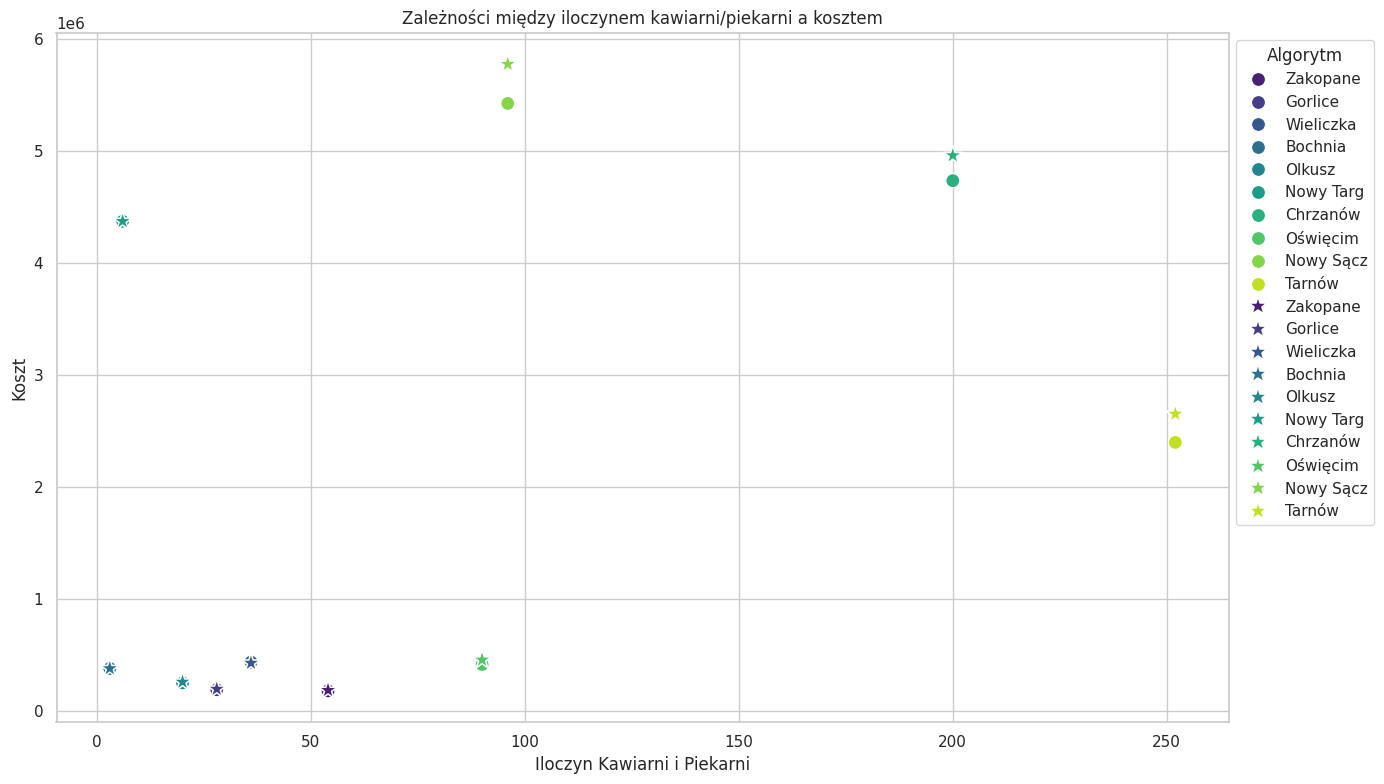

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('wyniki.csv')
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
df['Iloczyn Kawiarni i Piekarni'] = df['Liczba kawiarni'] * df['Liczba piekarni']
sns.scatterplot(data=df, x='Iloczyn Kawiarni i Piekarni', y='Koszt (VAM)', hue='Miasto', palette='viridis', s=100)
sns.scatterplot(data=df, x='Iloczyn Kawiarni i Piekarni', y='Koszt (Genetic Algorithm)', hue='Miasto', palette='viridis', s=200, marker='*')
plt.title('Zależności między iloczynem kawiarni/piekarni a kosztem')
plt.xlabel('Iloczyn Kawiarni i Piekarni')
plt.ylabel('Koszt')
plt.legend(title='Algorytm', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


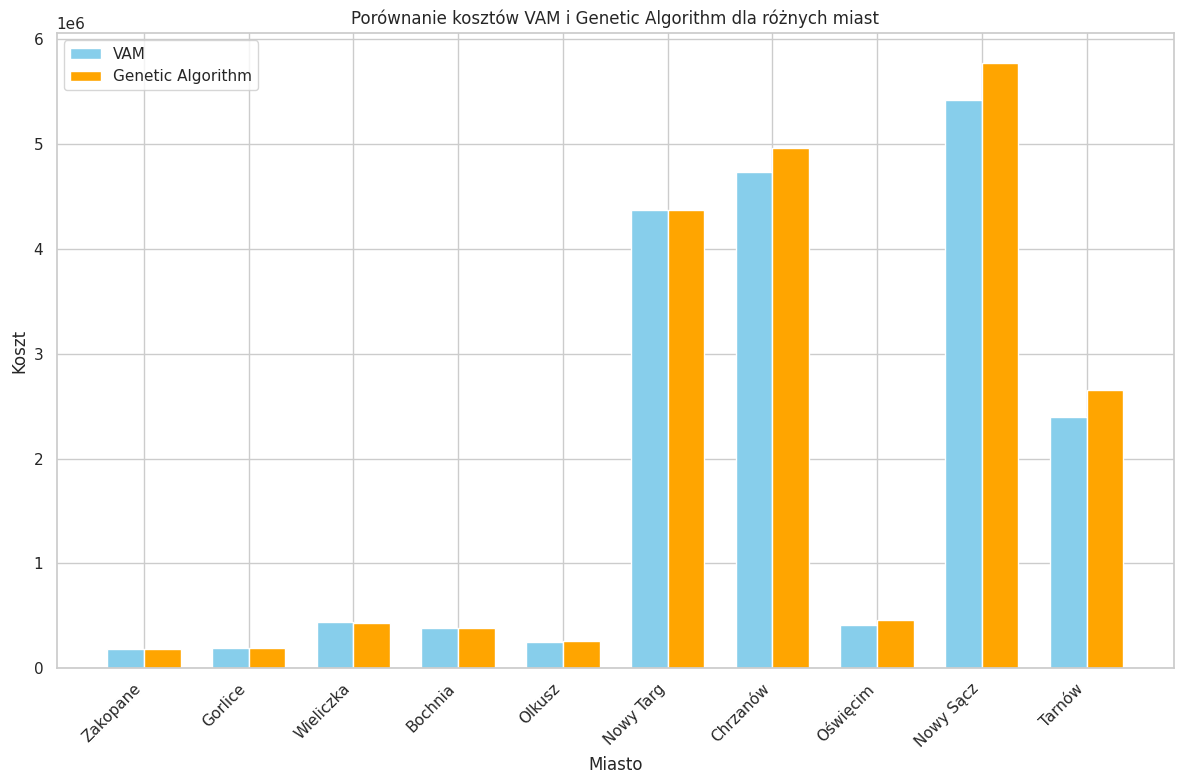

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('wyniki.csv')
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
bar_width = 0.35
bar_positions = range(len(df['Miasto']))
plt.bar(bar_positions, df['Koszt (VAM)'], color='skyblue', width=bar_width, label='VAM')
plt.bar([pos + bar_width for pos in bar_positions], df['Koszt (Genetic Algorithm)'], color='orange', width=bar_width, label='Genetic Algorithm')
plt.title('Porównanie kosztów VAM i Genetic Algorithm dla różnych miast')
plt.xlabel('Miasto')
plt.ylabel('Koszt')
plt.legend()
plt.xticks([pos + bar_width / 2 for pos in bar_positions], df['Miasto'], rotation=45, ha='right')
plt.tight_layout()
plt.show()


##Działanie algorytmu genetycznego

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



130534
[[   0    0    0    0    0    0    0    0    0    0    0  139    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
   134    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    7  165    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
    23    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0  159    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     8    0    0    0    0    0    0    0    0    0    0    0]
 [   2    0    0    3    0    0  145    0    0    0    0 7666    1    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    5
     3    0    0    0    0  164  150    0    0    0    0    0]
 [   0    0    0    0    0    8    0    0    0    0    0  109    0    0
     0    0    0    0    0  124    0    0    0    0    0    0    0    0
     0    0    0    0

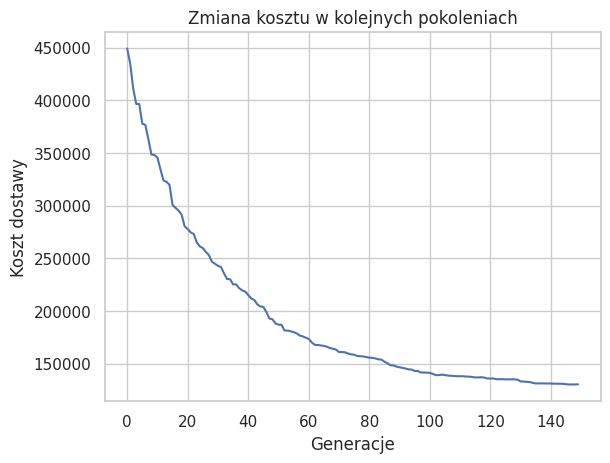

In [ ]:
def generuj_liste(oczekiwana_suma,n):
    lista = [random.randint(100, 300) for _ in range(n)]
    roznica = oczekiwana_suma - sum(lista)
    lista[random.randint(0, n-1)] += roznica
    return np.array(lista)
oczekiwana_suma = 12000
macierz_kosztu=np.random.randint(100, size=(20, 40))
macierz_kosztu=np.array(macierz_kosztu)
popyt = generuj_liste(oczekiwana_suma,20)
podaz = generuj_liste(oczekiwana_suma,40)

# Uruchomienie algorytmu z śledzeniem kosztu
best_solution, best_cost, costs_history = genetic_algorithm(population_size, generations, mutation_rate, macierz_kosztu, popyt, podaz)
print(best_cost)
print(best_solution)

# Wykres kosztu w kolejnych pokoleniach
plt.plot(costs_history)
plt.xlabel('Generacje')
plt.ylabel('Koszt dostawy')
plt.title('Zmiana kosztu w kolejnych pokoleniach')
plt.show()

In [ ]:
macierz_wynikowa4=vam_metoda(macierz_kosztu,popyt,podaz)
wypisywanie_macierzy(macierz_wynikowa4)
koszt1 = oblicznie_kosztu(macierz_kosztu, macierz_wynikowa4)
print(koszt1)

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 112   0   0   0   0 161   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   9   0   0   0 186   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0  51   0   0   0   0   0   0   0   0   0   0   0   0   0 116   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
256 279   0 145 143   0 146  57 163 250   0 4369   0   0   0   0 138   0   0   0   0 166 139   3 175   0 298   0 174 279  62   0 204 164   0 293   0 122 106   8 
  0   0   0   0   0   0   0 123   0   0 118   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0 137   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  83   0 
  0   0   0   0   0 170   0   0  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Vogel
Macierz
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 210   0   0   0 
  0   0   0   0  59   0   0   0   0   0   0   0   0   0 133   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0  71   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  44   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 141   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  40 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 100   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 161   0   0   0   0   0   0   0   0 
  0 138   0   0   0 

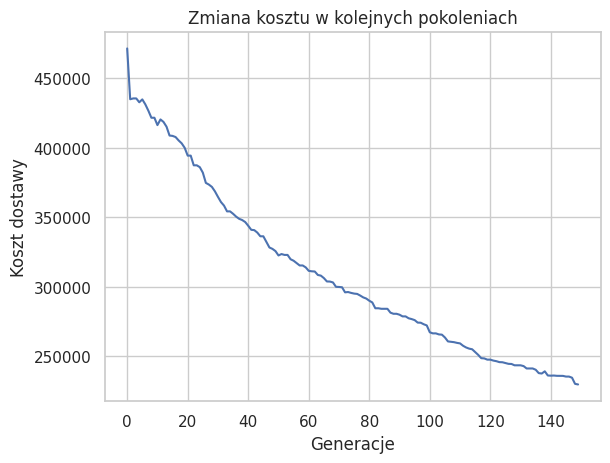

In [ ]:
oczekiwana_suma = 12000
macierz_kosztu=np.random.randint(100, size=(20, 40))
macierz_kosztu=np.array(macierz_kosztu)
popyt = generuj_liste(oczekiwana_suma,20)
podaz = generuj_liste(oczekiwana_suma,40)

# Uruchomienie algorytmu z śledzeniem kosztu
print("Vogel")
print("Macierz")
macierz_wynikowa4=vam_metoda(macierz_kosztu.copy(),popyt.copy(),podaz.copy())
wypisywanie_macierzy(macierz_wynikowa4)
koszt1 = oblicznie_kosztu(macierz_kosztu, macierz_wynikowa4)
print("Koszt Vogel",koszt1)
print("Genetyczny")
print("Macierz")
best_solution, best_cost, costs_history = genetic_algorithm(population_size, generations, mutation_rate, macierz_kosztu.copy(), popyt.copy(), podaz.copy())
wypisywanie_macierzy(best_solution)
print("Koszt genetyczny",best_cost)

# Wykres kosztu w kolejnych pokoleniach
plt.plot(costs_history)
plt.xlabel('Generacje')
plt.ylabel('Koszt dostawy')
plt.title('Zmiana kosztu w kolejnych pokoleniach')
plt.show()

##Porónanie wydajności

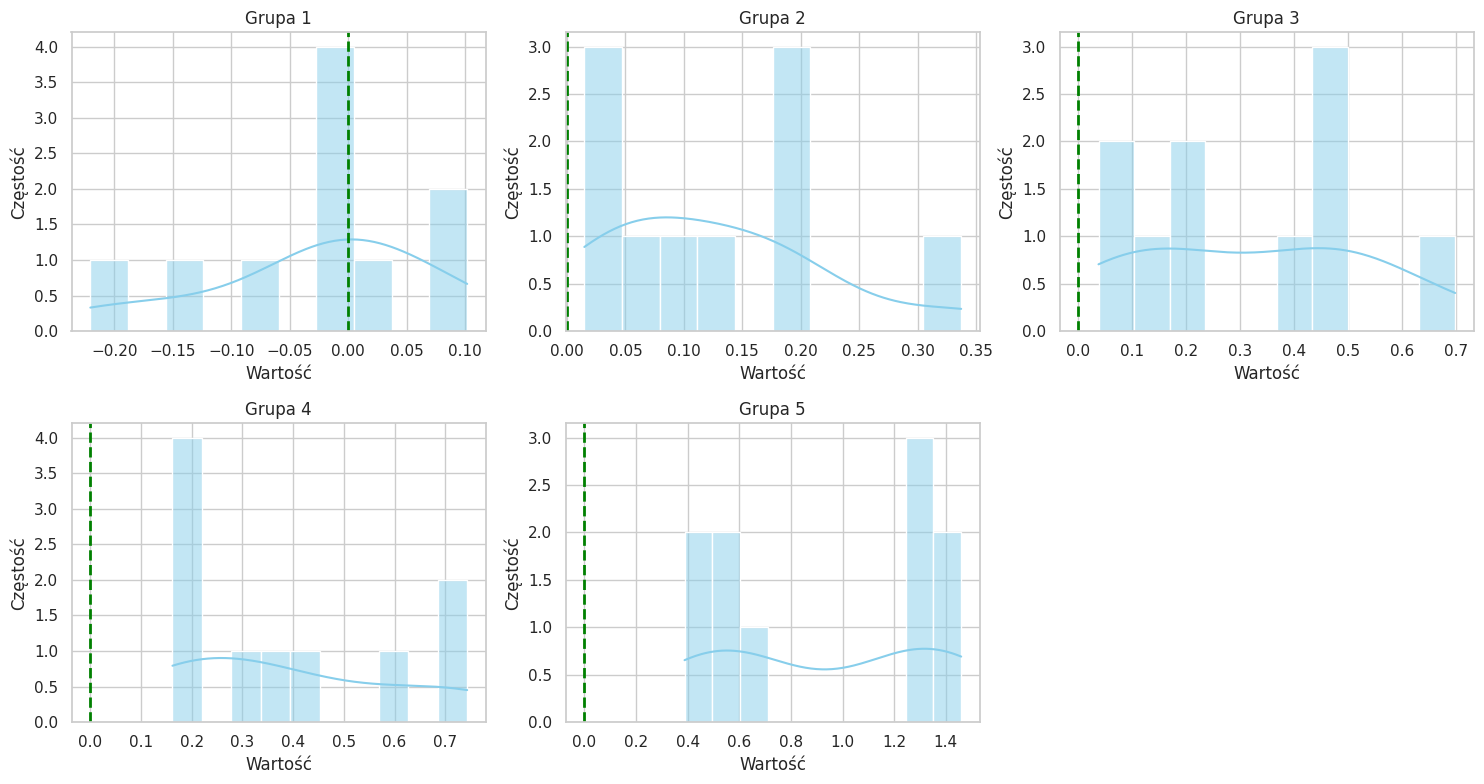

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

wsp = np.random.randn(100)

colors = np.where(wsp < 0, 'red', 'blue')
filepath1 = "wynik.txt"
filepath2 = "vogel.txt"
filepath3 = "genetyczny.txt"
data1 = []
data2 = []
data3 = []

# Wczytaj dane z pliku
with open(filepath1, "r") as f:
    for line in f:
        data1.append(float(line.strip()))
with open(filepath2, "r") as f:
    for line in f:
        data2.append(float(line.strip()))
with open(filepath3, "r") as f:
    for line in f:
        data3.append(float(line.strip()))

# Wygeneruj histogramy z dwoma różnymi kolorami dla pięciu grup
wsp = [data1[i] * 2 / (data2[i] + data3[i]) for i in range(len(data1))]
num_groups = 5
group_size = len(wsp) // num_groups

plt.figure(figsize=(15, 8))

for i in range(num_groups):
    start_idx = i * group_size
    end_idx = (i + 1) * group_size
    group_data = wsp[start_idx:end_idx]

    ax = plt.subplot(2, 3, i + 1)
    ax = sns.histplot(group_data, bins=10, kde=True, color='skyblue')

    ax.axvline(x=0, color='green', linestyle='--', linewidth=2)

    plt.title(f'Grupa {i+1}')
    plt.xlabel('Wartość')
    plt.ylabel('Częstość')

plt.tight_layout()
plt.show()
